# 資料載入與初步檢視


初步載入歷史 Tick/分K 資料並進行初步檢視。


In [46]:
import os
import sys

# 將專案根目錄添加到 Python 搜尋路徑
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.data_loader import load_and_inspect_data

# 指定資料檔案路徑
data_path = '../data/ticks_2025-04.parquet'

# 載入資料並檢視
df = load_and_inspect_data(data_path)

if df is not None:
    print("\n資料欄位：")
    print(df.columns)
    print(f"資料筆數：{len(df)}")


資料載入成功！
前 5 行資料：
             ts    close  volume  bid_price  bid_volume  ask_price  \
0  1.743433e+18  20807.0    89.0        0.0         0.0        0.0   
1  1.743433e+18  20808.0     2.0    20807.0         5.0    20808.0   
3  1.743433e+18  20809.0     1.0    20807.0         5.0    20808.0   
5  1.743433e+18  20807.0     1.0    20807.0         5.0    20810.0   
6  1.743433e+18  20807.0     1.0    20807.0         6.0    20810.0   

   ask_volume  tick_type               timestamp  is_traffic_limited  
0         0.0        1.0 2025-03-31 15:00:00.021               False  
1         2.0        1.0 2025-03-31 15:00:00.045               False  
3         2.0        1.0 2025-03-31 15:00:00.051               False  
5        15.0        2.0 2025-03-31 15:00:00.118               False  
6        18.0        2.0 2025-03-31 15:00:00.176               False  

資料基本資訊：
<class 'pandas.core.frame.DataFrame'>
Index: 3623517 entries, 0 to 126096
Data columns (total 10 columns):
 #   Column         

# 資料清洗

處理資料中的缺失值、異常值和重複資料。


In [27]:
from utils.data_cleaner import clean_data

df = clean_data(df)






處理缺失值前：
ts                    4
close                 4
volume                4
bid_price             4
bid_volume            4
ask_price             4
ask_volume            4
tick_type             4
timestamp             0
is_traffic_limited    0
dtype: int64

處理缺失值後：
ts                    0
close                 0
volume                0
bid_price             0
bid_volume            0
ask_price             0
ask_volume            0
tick_type             0
timestamp             0
is_traffic_limited    0
dtype: int64

處理異常值前：
                 ts         close        volume     bid_price    bid_volume  \
count  3.623513e+06  3.623513e+06  3.623513e+06  3.623513e+06  3.623513e+06   
mean   1.744626e+18  1.926879e+04  1.497686e+00  1.925888e+04  6.805559e+00   
min    1.743433e+18  1.701500e+04  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.744153e+18  1.863300e+04  1.000000e+00  1.863000e+04  2.000000e+00   
50%    1.744401e+18  1.934800e+04  1.000000e+00  1.934700e+04  3.000000e

# 時間序列處理

將時間欄位設定為索引，標準化時間格式，並處理非交易時間資料。


In [47]:
from utils.data_cleaner import process_time_series

df = process_time_series(df)


時間序列處理後：
                                   ts    close  volume  bid_price  bid_volume  \
timestamp                                                                       
2025-03-31 15:00:00.021  1.743433e+18  20807.0    89.0        0.0         0.0   
2025-03-31 15:00:00.045  1.743433e+18  20808.0     2.0    20807.0         5.0   
2025-03-31 15:00:00.051  1.743433e+18  20809.0     1.0    20807.0         5.0   
2025-03-31 15:00:00.118  1.743433e+18  20807.0     1.0    20807.0         5.0   
2025-03-31 15:00:00.176  1.743433e+18  20807.0     1.0    20807.0         6.0   

                         ask_price  ask_volume  tick_type  is_traffic_limited  
timestamp                                                                      
2025-03-31 15:00:00.021        0.0         0.0        1.0               False  
2025-03-31 15:00:00.045    20808.0         2.0        1.0               False  
2025-03-31 15:00:00.051    20808.0         2.0        1.0               False  
2025-03-31 15:00:00.11

# 初步探索性資料分析 (EDA)

進行初步的探索性資料分析，可視化價格、成交量等數據。


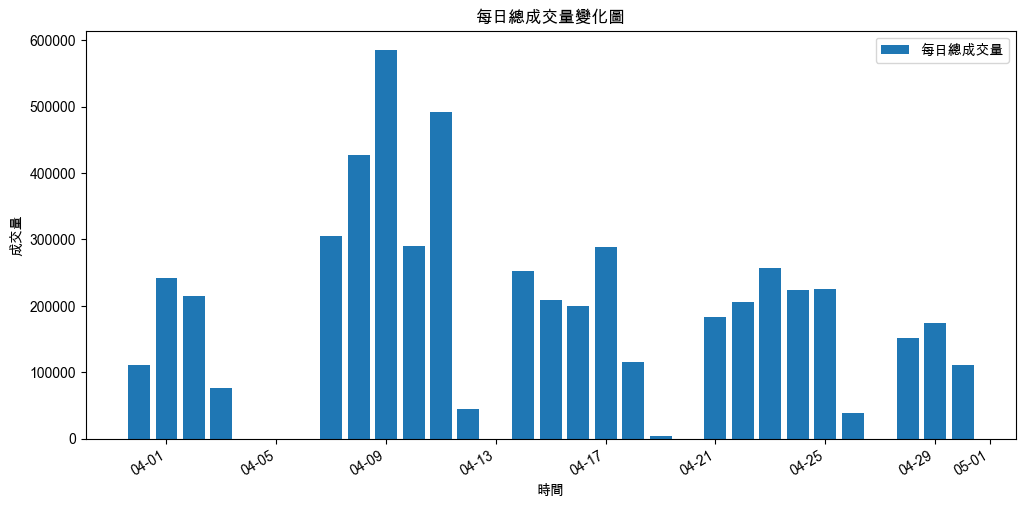

/Users/rekam/develop/futures-tick-predictor/utils/eda_analyzer.py:219: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



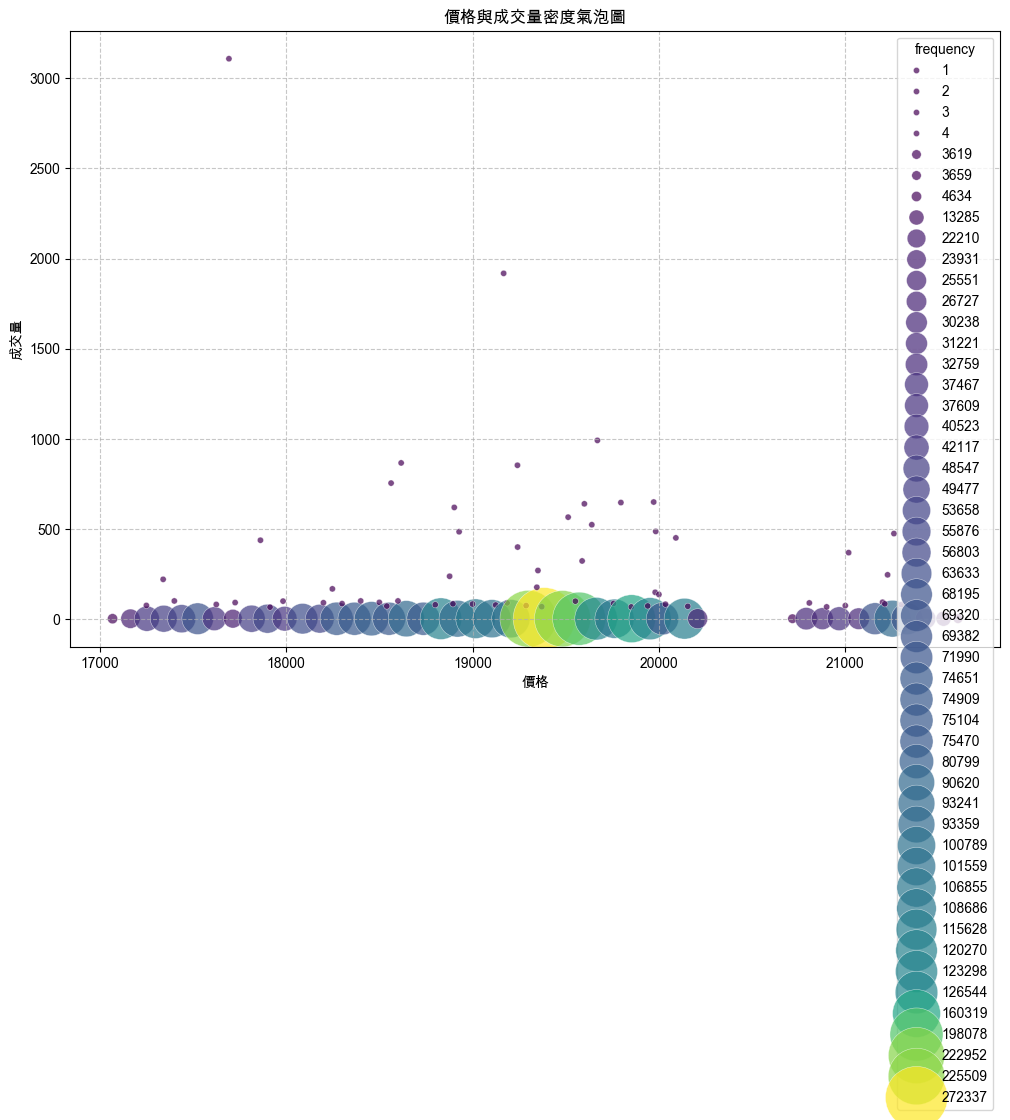

In [64]:
import importlib
from utils import eda_analyzer
importlib.reload(eda_analyzer)

import pandas as pd


eda_analyzer.plot_daily_close_price(df)

eda_analyzer.plot_daily_volume(df)

# eda_analyzer.plot_price_volume_distribution(df)
eda_analyzer.plot_price_volume_scatter(df)





# TODO: 繪製成交量變化圖

# plt.figure(figsize=(12, 6))

# # 將成交量重採樣到每日並加總

# daily_volume = df['volume'].resample('D').sum()

# plt.bar(daily_volume.index, daily_volume.values, label='每日總成交量')

# plt.title('每日總成交量變化圖')

# plt.xlabel('時間')

# plt.ylabel('成交量')

# plt.legend()

# plt.show()



# TODO: 基礎波動率分析 (e.g., 日報酬率標準差)

# 如果資料是 Tick 或分K，可能需要先 resampling 到日頻率

# daily_returns = df['close'].resample('D').ffill().pct_change().dropna()

# daily_volatility = daily_returns.std()

# print(f"\n日報酬率標準差 (波動率): {daily_volatility:.4f}")



# TODO: 價格與成交量分佈圖

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)

# sns.histplot(df['close'], kde=True)

# plt.title('價格分佈')

# plt.xlabel('價格')

# plt.ylabel('頻率')



# plt.subplot(1, 2, 2)

# sns.histplot(df['volume'], kde=True)

# plt.title('成交量分佈')

# plt.xlabel('成交量')

# plt.ylabel('頻率')

# plt.tight_layout()

# plt.show()


# 技術指標特徵工程 (基礎)

計算基礎的技術指標作為初步特徵。


In [ ]:
# TODO: 計算基礎技術指標 (e.g., SMA, EMA, RSI)

# 需要安裝 ta-lib 或使用 pandas 內建函數

# 例如使用 pandas rolling 計算 SMA

# df['SMA_10'] = df['close'].rolling(window=10).mean()



# 例如使用 ta-lib (需要先安裝)

# import talib

# df['RSI_14'] = talib.RSI(df['close'], timeperiod=14)



# TODO: 考慮將特徵工程函數移至 features/feature_engineering.py

# from features.feature_engineering import calculate_sma

# df['SMA_20'] = calculate_sma(df['close'], window=20)



# print("\n新增技術指標特徵後：")

# print(df.head())


# 製作標註欄位 (Target Labeling)

定義預測目標並創建對應的標註欄位。


In [ ]:
# TODO: 定義預測目標 (e.g., 未來 N Tick/分鐘 後價格漲跌幅是否超過 X%)

# 範例：預測未來 5 分鐘收盤價是否上漲超過 0.1%

# lookahead_window = '5T' # 5 分鐘

# price_change_threshold = 0.001 # 0.1%



# TODO: 創建標註欄位

# future_price = df['close'].shift(-pd.Timedelta(lookahead_window))

# price_change = (future_price - df['close']) / df['close']

# df['target_price_up'] = (price_change > price_change_threshold).astype(int)



# TODO: 處理標註欄位中的 NaN (由於 shift 操作會產生 NaN)

# df.dropna(subset=['target_price_up'], inplace=True)



# TODO: 考慮將標註函數移至 features/labeling.py

# from features.labeling import create_up_down_label

# df['target_up_down'] = create_up_down_label(df['close'], window='10T', threshold=0.002)



# print("\n新增標註欄位後：")

# print(df.head())

# print("\n標註欄位分佈：")

# print(df['target_price_up'].value_counts())
